In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Load the sheet 
df1 = pd.read_excel('Business1.xlsx', sheet_name="Table 1")
df4 = pd.read_excel('Business1.xlsx', sheet_name="Table 4")
df6 = pd.read_excel('Business1.xlsx', sheet_name="Table 6")
df7 = pd.read_excel('Business1.xlsx', sheet_name="Table 7")
df8 = pd.read_excel('Business1.xlsx', sheet_name="Table 8")

### DATA CLEANING

In [4]:
def clean_data(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = ["Space economy", "Government", "Private industries", "Mining",
                     "Construction", "Manufacturing", "Wholesale trade", "Retail trade", "Transportation and warehousing", "Information", 
                     "Finance, insurance, real estate, rental, and leasing", "Professional and business services", 
                     "Educational services, health care, and social assistance", "Arts, entertainment, recreation, accommodation, and food services", 
                     "Other services, except government", "Space economy excluding satellite television, satellite radio, and educational services"]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def private_only(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = ["Private industries",  
                     "Construction", "Manufacturing", "Wholesale trade", "Retail trade", "Transportation and warehousing", "Information", 
                     "Finance, insurance, real estate, rental, and leasing", "Professional and business services", 
                     "Educational services, health care, and social assistance", "Arts, entertainment, recreation, accommodation, and food services", 
                     "Other services, except government", "Space economy excluding satellite television, satellite radio, and educational services"]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def clean_employment_compensation(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = [
    "Space economy, private industries",
    "Mining",
    "Utilities",
    "Construction",
    "Manufacturing",
    "Wholesale trade",
    "Retail trade",
    "Transportation and warehousing",
    "Information",
    "Finance, insurance, real estate, rental, and leasing",
    "Professional and business services",
    "Educational services, health care, and social assistance",
    "Arts, entertainment, recreation, accommodation, and food services",
    "Other services, except government",
]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def rename_columns(df):
    df['Category'] = df['Category'].replace({
        'Finance, insurance, real estate, rental, and leasing': 'Finance and Real Estate',
        'Professional and business services': 'Business',
        'Educational services, health care, and social assistance': 'Education and Healthcare',
        'Other services, except government': 'Other Services',
        'Arts, entertainment, recreation, accommodation, and food services': 'Recreation and Entertainment',
        'Space economy, private industries': 'Space economy'
        })
    return df

In [5]:
table1_data = rename_columns(clean_data(df1))
table4_data = rename_columns(clean_data(df4))
table1_data

,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962
1,Private industries,79861,89170,90495,98536,99506,98699,95196,96575,92167,85568,87779,86351
2,Mining,53,41,51,45,26,10,4,5,2,2,2,2
3,Construction,265,239,346,406,403,585,360,1049,850,513,632,646
4,Manufacturing,24193,26789,27121,29264,32387,32514,33589,37565,35618,38519,38760,38773
5,Wholesale trade,14496,17163,18946,21350,21696,21736,21647,19279,20007,14253,14875,14101
6,Retail trade,219,245,259,331,478,379,442,667,406,570,602,631
7,Transportation and warehousing,909,821,727,703,743,729,859,691,641,627,915,925
8,Information,31515,35454,34745,37502,34604,33759,29919,29066,26709,24360,22771,21859
9,Finance and Real Estate,242,145,131,209,255,220,154,133,97,112,183,178


In [6]:
table1_industries = table1_data[table1_data["Category"] != "Private industries"]

In [7]:
table1_without_gov = rename_columns(private_only(table1_data))
table4_without_gov = rename_columns(private_only(table4_data))

In [8]:
table6_data = rename_columns(clean_data(df6))
new_row = {
    "Category": "Mining",
    2012: 92.800,
    2013: 93.932,
    2014: 96.155,
    2015: 98.580,
    2016: 97.098,
    2017: 100.000,
    2018: 103.326,
    2019: 104.856,
    2020: 108.712,
    2021: 110.872,
    2022: 113.527,
    2023: 115.574
}
table6_data = pd.concat([table6_data, pd.DataFrame([new_row])], ignore_index=True)
new_row = {
    "Category": "Utilities",
    2012: 100.661,
    2013: 100.104,
    2014: 99.833,
    2015: 100.297,
    2016: 99.188,
    2017: 100.000,
    2018: 100.171,
    2019: 99.942,
    2020: 99.913,
    2021: 99.509,
    2022: 101.024,
    2023: 102.055
}

table6_data.loc[len(table6_data)] = new_row

In [19]:
table7_data = rename_columns(clean_employment_compensation(df7))
table8_data = rename_columns(clean_employment_compensation(df8))

In [21]:
table6_data = table6_data.copy()
table8_data_edited = table8_data.copy()

table6_data["Category_key"] = table6_data["Category"]
table8_data_edited["Category_key"] = table8_data_edited["Category"]

t6 = (table6_data
      .drop(columns=["Category"])
      .groupby("Category_key", as_index=True)
      .first())
t8 = (table8_data_edited
      .drop(columns=["Category"])
      .groupby("Category_key", as_index=True)
      .first())

# union of rows (categories) and columns (years)
rows = t8.index.union(t6.index)
cols = t8.columns.union(t6.columns)

t6u = t6.reindex(index=rows, columns=cols)
t8u = t8.reindex(index=rows, columns=cols)

# multiplies to get real compensation
real_compensation = t8u.mul(t6u.div(100))

name_map8 = dict(zip(table8_data_edited["Category_key"], table8_data_edited["Category"]))
name_map6 = dict(zip(table6_data["Category_key"], table6_data["Category"]))
display_name = pd.Series(rows, index=rows).map(name_map8).fillna(pd.Series(rows, index=rows).map(name_map6))

real_compensation = real_compensation.copy()
real_compensation.insert(0, "Category", display_name.values)
real_compensation = real_compensation = real_compensation.rename_axis(None).reset_index(drop=True)

table8_data_adjusted = real_compensation[real_compensation["Category"] != "Private industries"]

### Data Visualization

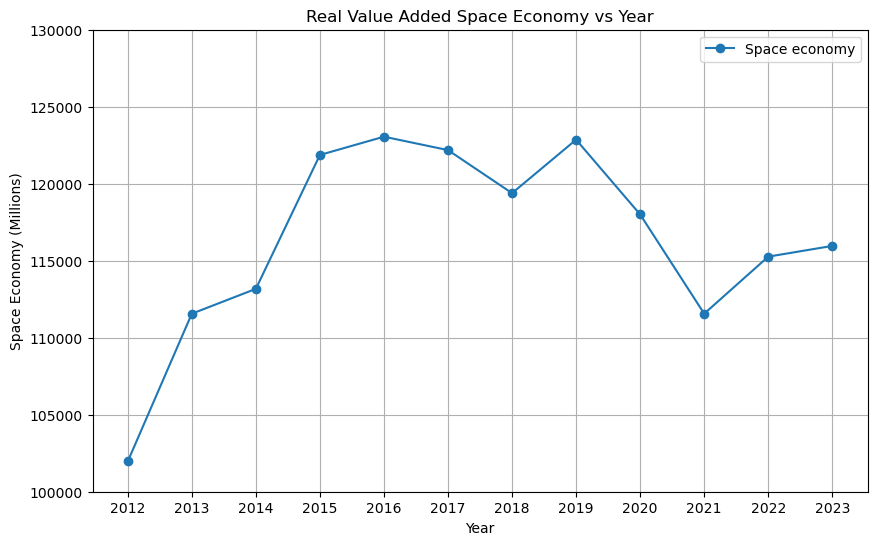

In [12]:
# Pick only the rows we want
df_subset = table1_data[table1_data["Category"].isin(
    ["Space economy"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")

plt.title("Real Value Added Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(100000, 130000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()

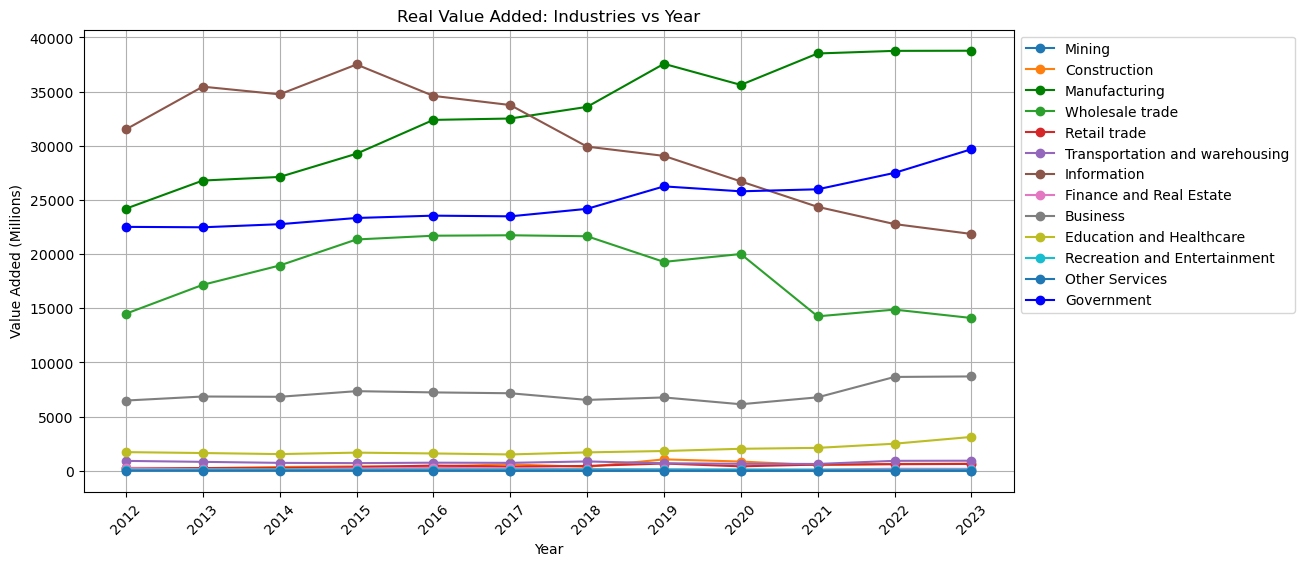

In [13]:
df_t = table1_data.set_index("Category").T
df_t = df_t.apply(pd.to_numeric, errors='coerce')
df_t.index = df_t.index.astype(int)

other_cols = [c for c in df_t.columns if c not in ["Space economy", "Private industries",
                                                   'Space economy excluding satellite television, satellite radio, and educational services']]

colors = {
    "Government": "blue",
    "Manufacturing": "green"
}

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col, color=colors.get(col, None))  # None uses default cycle

plt.title("Real Value Added: Industries vs Year")
plt.xlabel("Year")
plt.ylabel("Value Added (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

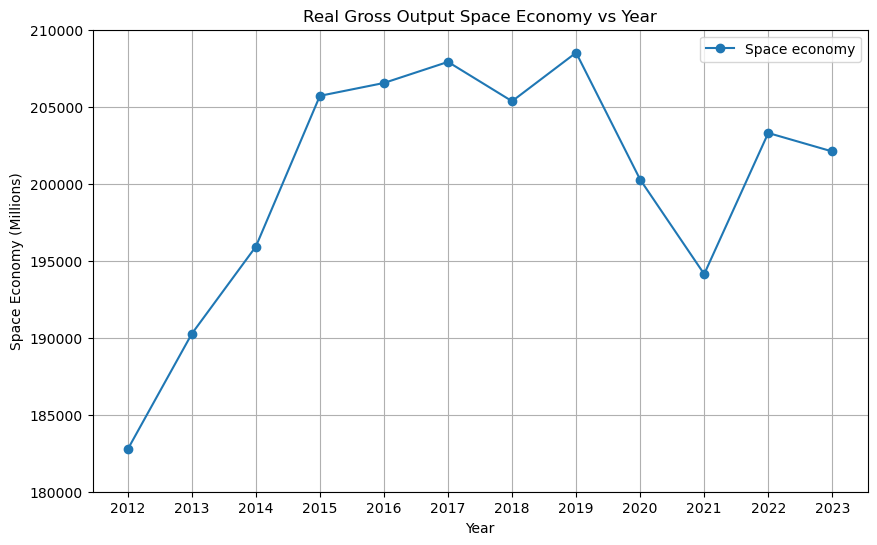

In [14]:
# Pick only the rows we want
df_subset = table4_data[table4_data["Category"].isin(
    ["Space economy"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")

plt.title("Real Gross Output Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(180000, 210000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()

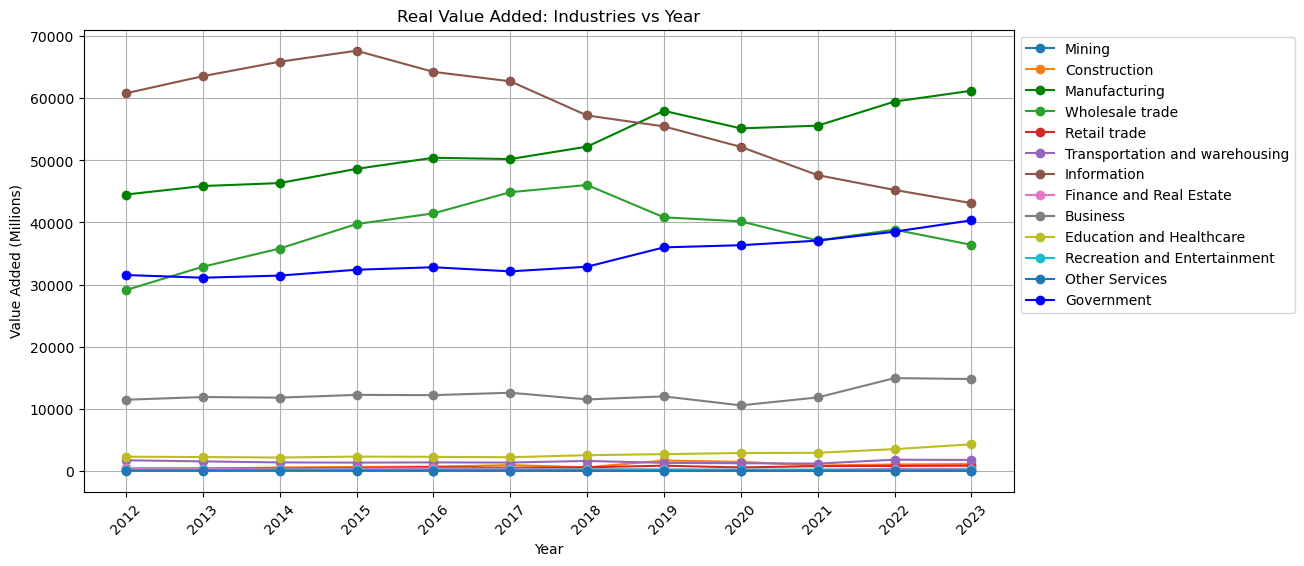

In [15]:
df_t = table4_data.set_index("Category").T
df_t = df_t.apply(pd.to_numeric, errors='coerce')
df_t.index = df_t.index.astype(int)

other_cols = [c for c in df_t.columns if c not in ["Space economy", "Private industries",
                                                   'Space economy excluding satellite television, satellite radio, and educational services']]

colors = {
    "Government": "blue",
    "Manufacturing": "green"
}

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col, color=colors.get(col, None))  # None uses default cycle

plt.title("Real Value Added: Industries vs Year")
plt.xlabel("Year")
plt.ylabel("Value Added (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

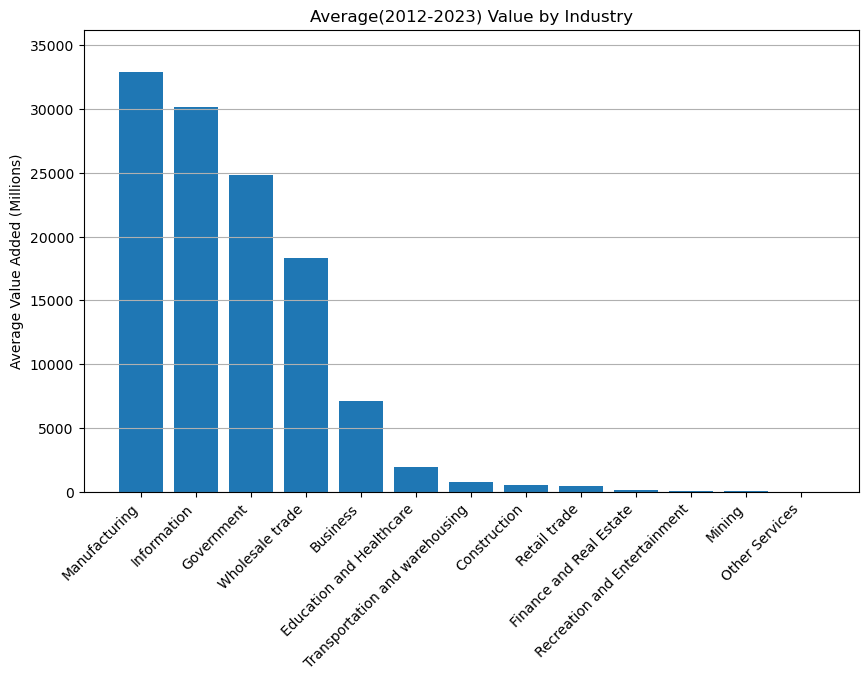

In [16]:
# Filter out the summary rows
rows_to_exclude = [
    "Space economy",
    "Private industries",
    "Space economy excluding satellite television, satellite radio, and educational services"
]
filtered_df = table1_data[~table1_data['Category'].isin(rows_to_exclude)]

# Set index and calculate the mean
df_indexed = filtered_df.set_index('Category')
average_by_industry = df_indexed.mean(axis=1)
average_by_industry_sorted = average_by_industry.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_by_industry_sorted.index, average_by_industry_sorted.values)

# Find the maximum value of the tallest bar
max_value = average_by_industry_sorted.iloc[0]

# Set the y-axis limit to be 20% higher than the max value
plt.ylim(top=max_value * 1.1)

# Add labels and title
plt.ylabel('Average Value Added (Millions)')
plt.title('Average(2012-2023) Value by Industry')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y');

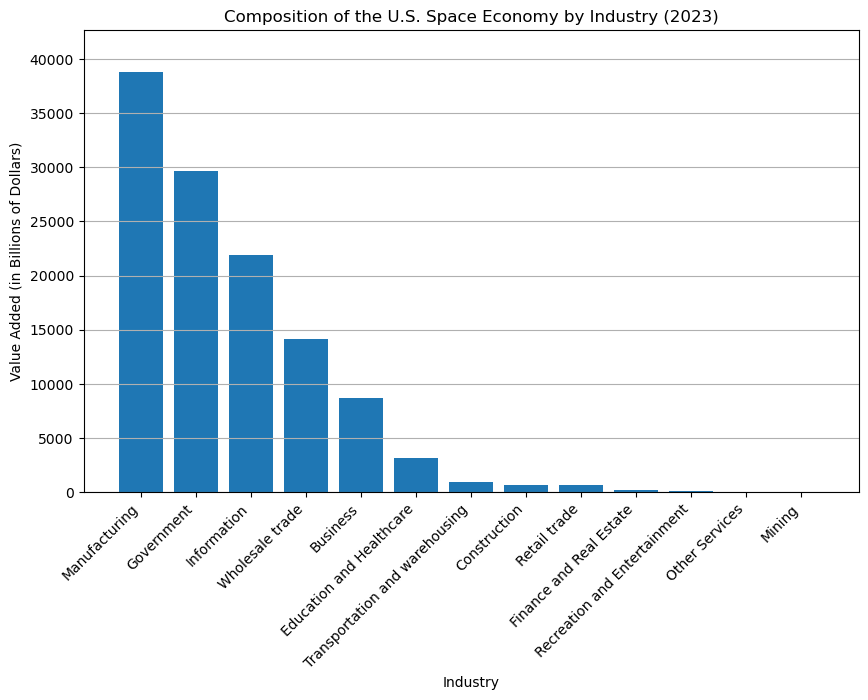

In [17]:
# Define and exclude summary rows
rows_to_exclude = ["Space economy", "Private industries", "Space economy excluding satellite television, satellite radio, and educational services"]
filtered_df = table1_data[~table1_data['Category'].isin(rows_to_exclude)]

# Select data for the latest year and sort it
latest_year_data = filtered_df[['Category', 2023]].sort_values(by=2023, ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(latest_year_data['Category'], latest_year_data[2023])

max_value = latest_year_data[2023].max()
plt.ylim(top=max_value * 1.1) 

# Add labels, title, and formatting
plt.xlabel('Industry')
plt.ylabel('Value Added (in Billions of Dollars)')
plt.title('Composition of the U.S. Space Economy by Industry (2023)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y');

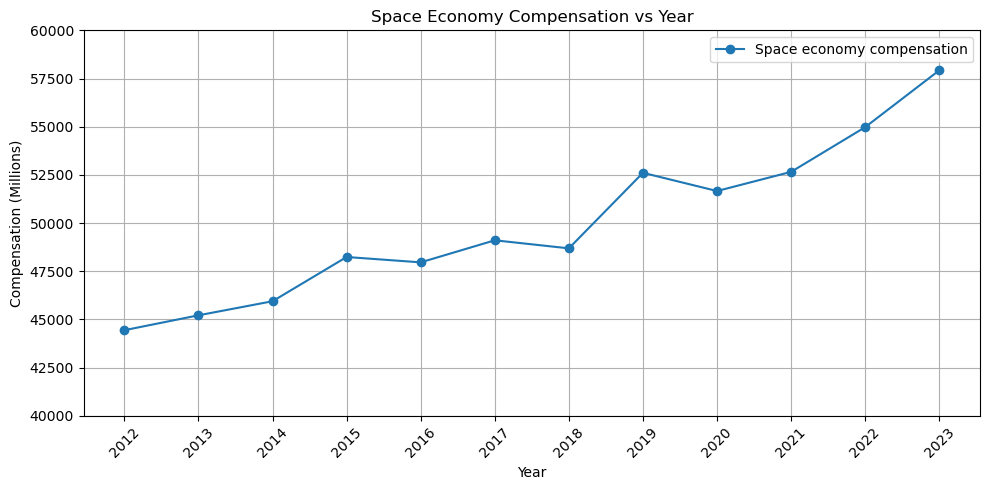

In [23]:
# Set "Category" as index
df_subset = table8_data.set_index("Category")
df_t = df_subset.T
df_t.index = df_t.index.astype(int)

# Plot only Space economy
plt.figure(figsize=(10, 5))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy compensation")
plt.title("Space Economy Compensation vs Year")
plt.xlabel("Year")
plt.ylabel("Compensation (Millions)")
plt.ylim(40000, 60000)
plt.xticks(df_t.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

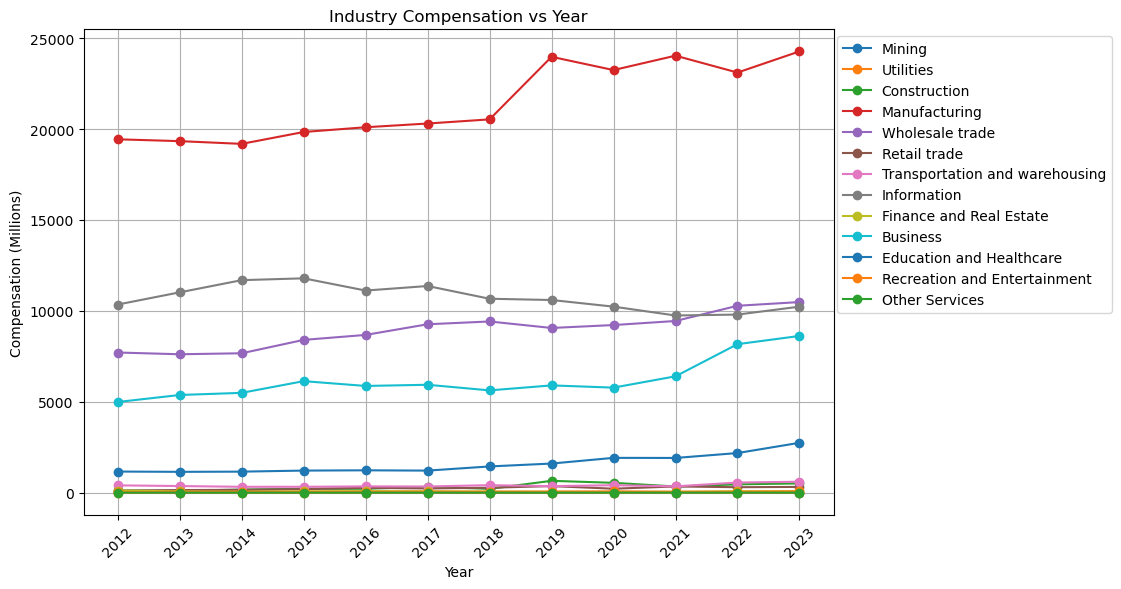

In [25]:
# Plot all other categories
other_cols = [c for c in df_t.columns if c != "Space economy"]

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col)

plt.title("Industry Compensation vs Year")
plt.xlabel("Year")
plt.ylabel("Compensation (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper right", bbox_to_anchor=(1.38, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
data = {
    "Year": range(2012, 2024),
    "Space_economy": [101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962],
    "Mining": [53,41,51,45,26,10,4,5,2,2,2,2],
    "Construction": [265,239,346,406,403,585,360,1049,850,513,632,646],
    "Manufacturing": [24193,26789,27121,29264,32387,32514,33589,37565,35618,38519,38760,38773],
    "Wholesale_trade": [14496,17163,18946,21350,21696,21736,21647,19279,20007,14253,14875,14101],
    "Retail_trade": [219,245,259,331,478,379,442,667,406,570,602,631],
    "Transportation": [909,821,727,703,743,729,859,691,641,627,915,925],
    "Information": [31515,35454,34745,37502,34604,33759,29919,29066,26709,24360,22771,21859],
    "Finance_RealEstate": [242,145,131,209,255,220,154,133,97,112,183,178],
    "Business": [6481,6852,6826,7346,7232,7153,6539,6767,6139,6776,8659,8706],
    "Education_Healthcare": [1719,1635,1537,1672,1595,1506,1696,1820,2027,2112,2496,3121],
    "Recreation_Entertainment": [82,89,98,86,97,102,106,106,108,87,79,94],
    "Other_Services": [3,4,4,4,5,5,4,5,5,6,7,6],
    "Government": [22512,22474,22759,23333,23548,23485,24177,26249,25795,25981,27496,29679]
}

df = pd.DataFrame(data)

# List of sectors
sectors = ["Construction","Manufacturing","Wholesale_trade","Retail_trade", "Mining",
           "Transportation","Information","Finance_RealEstate","Business",
           "Education_Healthcare","Recreation_Entertainment","Other_Services","Government"]

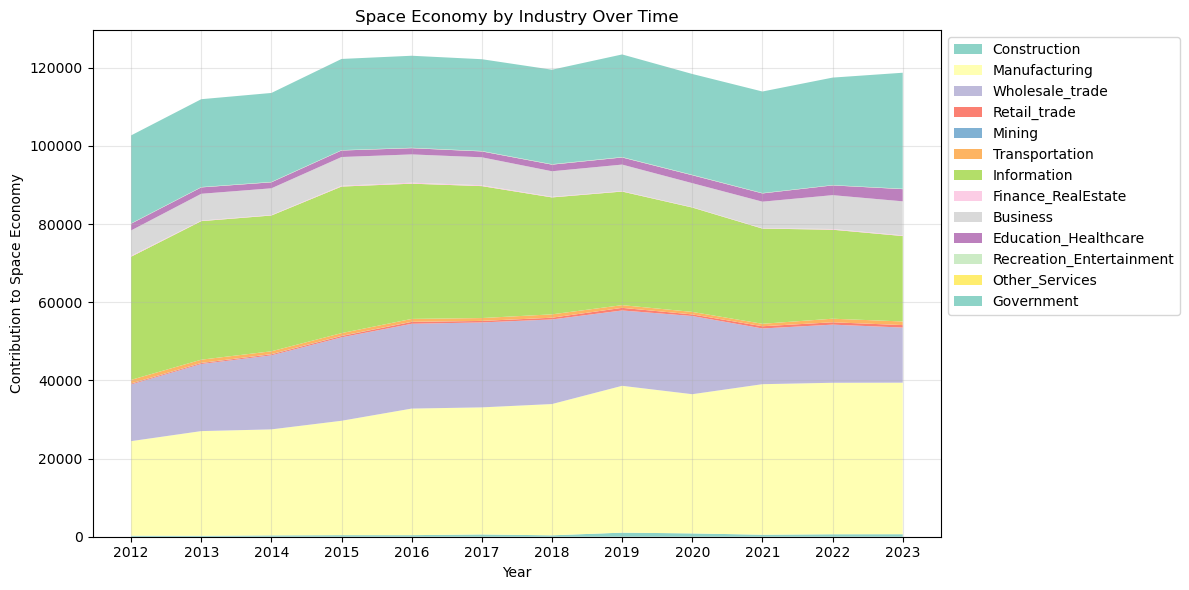

In [29]:
# Stacked area chart of sectors
colors = plt.cm.Set3.colors[:len(sectors)]
plt.figure(figsize=(12,6))
plt.stackplot(df["Year"], [df[sector] for sector in sectors], labels=sectors, colors=colors)
plt.xlabel("Year")
plt.ylabel("Contribution to Space Economy")
plt.title("Space Economy by Industry Over Time")
plt.xticks(df["Year"])  # show all years
plt.grid(alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

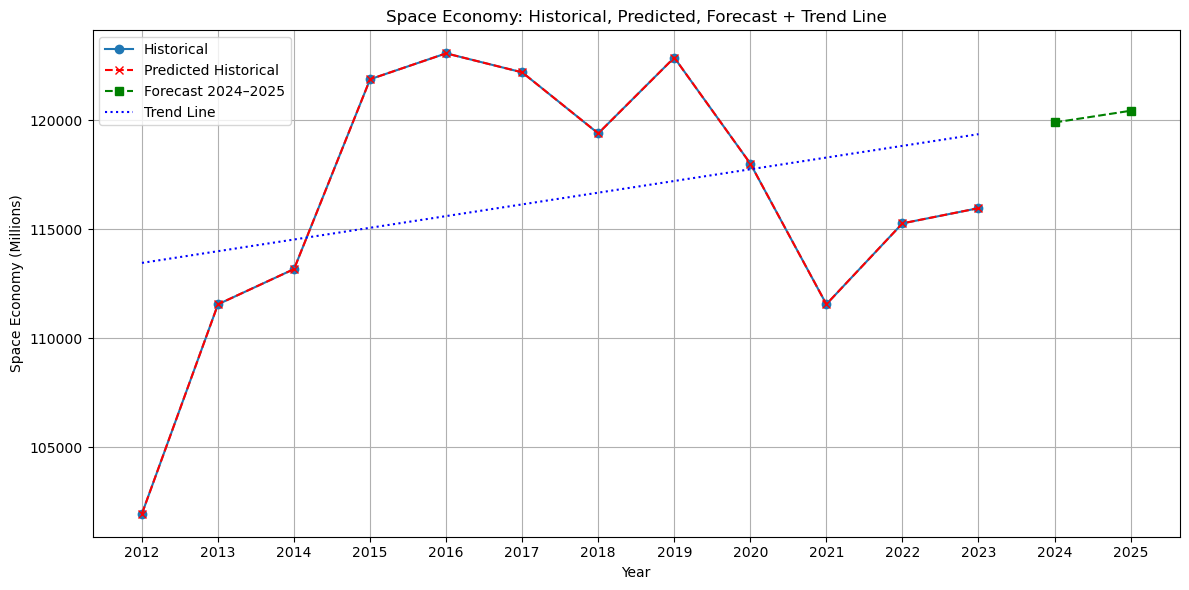

R²: 1.0
MAE: 1.5764574830730755e-11
RMSE: 1.925037439697619e-11
Coefficients:
Construction: 4.45
Manufacturing: 0.86
Wholesale_trade: 1.27
Retail_trade: 8.12
Mining: -7.50
Transportation: 1.59
Information: 0.89
Finance_RealEstate: -3.06
Business: 1.21
Education_Healthcare: 6.08
Recreation_Entertainment: 18.56
Other_Services: 0.82
Government: -0.90
[119887.98484848 120424.07226107]


In [30]:
# Regression: Industries -> Space_economy
X = df[sectors]
y = df["Space_economy"]

regression_model = LinearRegression()
regression_model.fit(X, y)

# Add predicted values for historical years
df["Predicted"] = regression_model.predict(X)

X_years = df["Year"].values.reshape(-1,1)
y_space = df["Space_economy"].values

fit_model = LinearRegression()
fit_model.fit(X_years, y_space)
df["Trend"] = fit_model.predict(X_years)

# Forecast for 2024–2025 using trend model
future_years = np.array([2024, 2025]).reshape(-1,1)
forecast_values = fit_model.predict(future_years)

forecast_df = pd.DataFrame({
    "Year": [2024, 2025],
    "Predicted_Space_Economy": forecast_values
})

# Plot historical, predicted, forecast, trend
plt.figure(figsize=(12,6))

plt.plot(df["Year"], df["Space_economy"], label="Historical", marker='o')
plt.plot(df["Year"], df["Predicted"], label="Predicted Historical", linestyle='--', marker='x', color='red')
plt.plot(forecast_df["Year"], forecast_df["Predicted_Space_Economy"], 
         label="Forecast 2024–2025", linestyle='--', marker='s', color='green')
plt.plot(df["Year"], df["Trend"], label="Trend Line", linestyle=':', color='blue')

plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.title("Space Economy: Historical, Predicted, Forecast + Trend Line")
plt.xticks(list(df["Year"]) + list(forecast_df["Year"]))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Model evaluation
r2 = r2_score(y, df["Predicted"])
mae = mean_absolute_error(y, df["Predicted"])
rmse = np.sqrt(mean_squared_error(y, df["Predicted"]))

print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("Coefficients:")
for col, coef in zip(X.columns, regression_model.coef_):
    print(f"{col}: {coef:.2f}")

print(forecast_values)

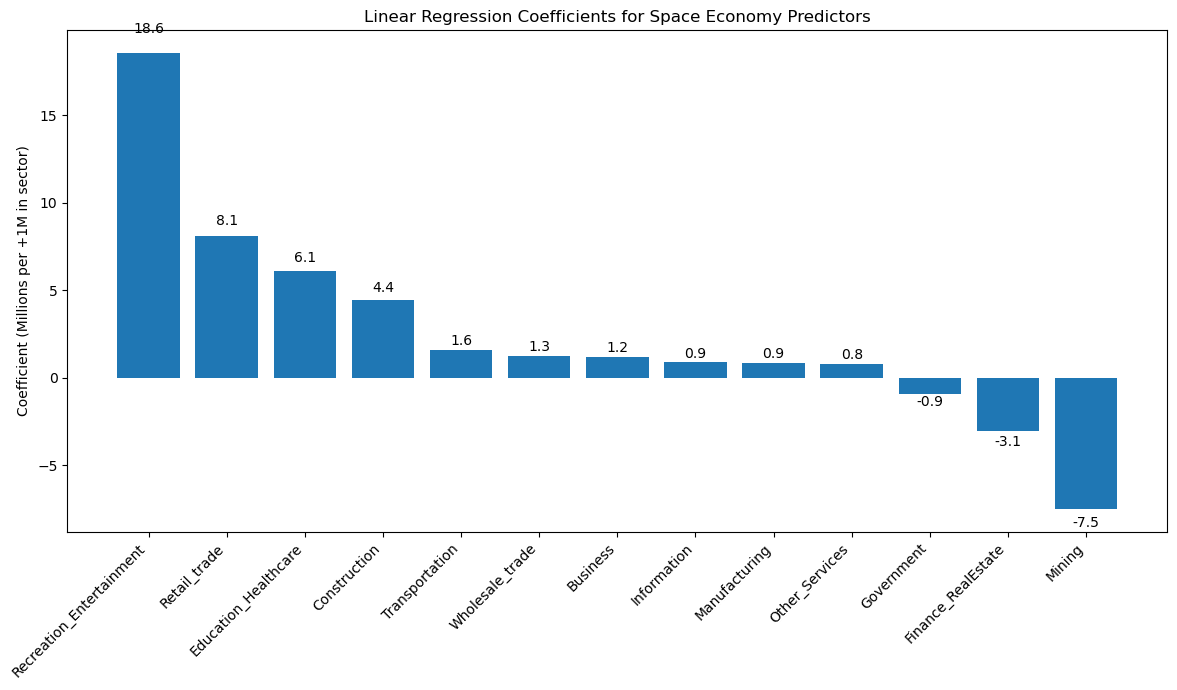

In [31]:

coefficients = pd.Series(regression_model.coef_, index=sectors).sort_values(ascending=False)

plt.figure(figsize=(12,7))
bars = plt.bar(coefficients.index, coefficients.values)

plt.ylabel("Coefficient (Millions per +1M in sector)")
plt.title("Linear Regression Coefficients for Space Economy Predictors")
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    offset = yval * 0.05 + 0.05 if yval >= 0 else yval * 0.05 - 0.05
    va = 'bottom' if yval >= 0 else 'top'
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, f'{yval:.1f}', ha='center', va=va)

plt.tight_layout()
plt.show()

In [32]:
# ---- 1. Reshape each dataset from wide → long ----
df_space_long = table1_data.melt(id_vars=["Category"], var_name="Year", value_name="SpaceEconomy")
df_employees_long = table7_data.melt(id_vars=["Category"], var_name="Year", value_name="Employees")
df_comp_long = table8_data_adjusted.melt(id_vars=["Category"], var_name="Year", value_name="Compensation")

# ---- 2. Keep only the relevant rows ----
df_space_long = df_space_long[df_space_long["Category"] == "Space economy"]
df_employees_long = df_employees_long[df_employees_long["Category"].str.contains("Space economy", case=False)]
df_comp_long = df_comp_long[df_comp_long["Category"].str.contains("Space economy", case=False)]

# ---- 3. Clean and convert Year to numeric ----
for df in [df_space_long, df_employees_long, df_comp_long]:
    df["Year"] = df["Year"].astype(str).str.strip().astype(int)
    df.drop(columns=["Category"], inplace=True)

# ---- 4. Merge datasets on Year using inner join (keeps only matching years) ----
df_merged = df_space_long.merge(df_employees_long, on="Year", how="inner")
df_merged = df_merged.merge(df_comp_long, on="Year", how="inner")

# ---- 5. Optional: sort by Year ----
df_merged = df_merged.sort_values(by="Year").reset_index(drop=True)

In [37]:
# Define predictors and target
X = df_merged[["Employees", "Compensation"]]
y = df_merged["SpaceEconomy"]

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Output the results
print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"  {col}: {coef}")


Intercept: 161709.50620617426
Coefficients:
  Employees: -84.9827629570352
  Compensation: -0.22107702606062543


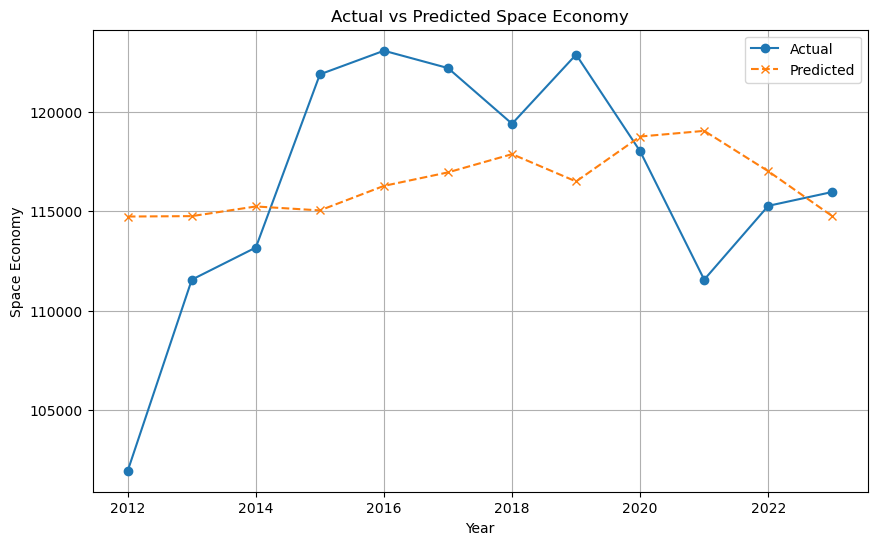

R^2: 0.062
RMSE: 5782.34


In [39]:
y_pred = model.predict(X) 

# Plot actual vs predicted 
plt.figure(figsize=(10,6)) 
plt.plot(df_merged["Year"], df_merged["SpaceEconomy"], marker='o', label="Actual") 
plt.plot(df_merged["Year"], y_pred, marker='x', linestyle='--', label="Predicted") 
plt.xlabel("Year") 
plt.ylabel("Space Economy") 
plt.title("Actual vs Predicted Space Economy") 
plt.legend() 
plt.grid(True) 
plt.show()

# Predict for historical data
y_pred = model.predict(df_merged[["Employees", "Compensation"]])
y_true = df_merged["SpaceEconomy"]

# R^2
r2 = r2_score(y_true, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"R^2: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

In [40]:
# Employees trend
X_year = df_merged[["Year"]]
y_emp = df_merged["Employees"]
emp_model = LinearRegression()
emp_model.fit(X_year, y_emp)

# Compensation trend
y_comp = df_merged["Compensation"]
comp_model = LinearRegression()
comp_model.fit(X_year, y_comp)

# Predict for 2024 and 2025
future_years = pd.DataFrame({"Year": [2024, 2025]})
pred_employees = emp_model.predict(future_years)
pred_compensation = comp_model.predict(future_years)

# Combine into a dataframe
future_predictors = pd.DataFrame({
    "Employees": pred_employees,
    "Compensation": pred_compensation
}, index=[2024, 2025])

print(future_predictors)

       Employees  Compensation
2024  346.136364  64970.008388
2025  338.465035  66856.201545


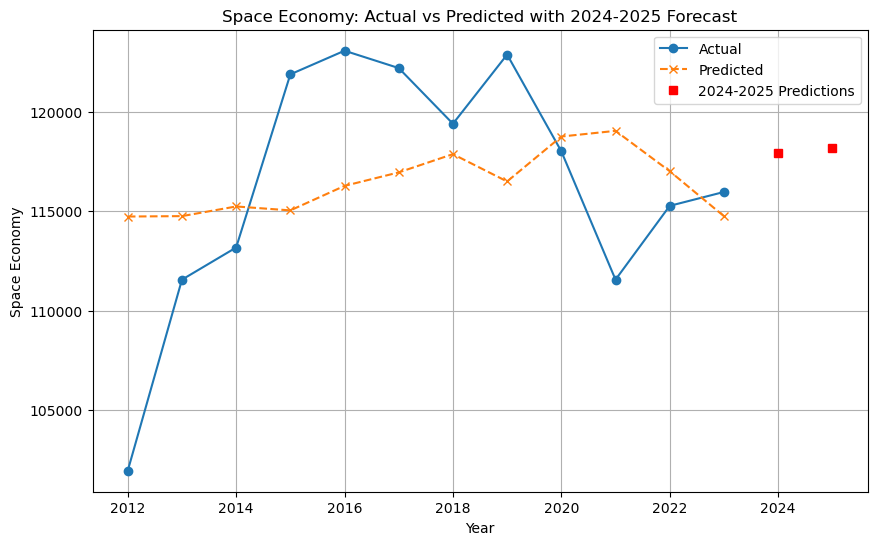

[117930.505396   118165.44215625]


In [41]:
# Historical actual and predicted
y_pred = model.predict(df_merged[["Employees", "Compensation"]])

# Future predictions for 2024 and 2025
future_data = pd.DataFrame({
    "Employees": [346.136364, 338.465035],
    "Compensation": [64970.008388, 66856.201545]
}, index=[2024, 2025])
future_predictions = model.predict(future_data)

# Plot
plt.figure(figsize=(10,6))

# Historical actual
plt.plot(df_merged["Year"], df_merged["SpaceEconomy"], marker='o', label="Actual")

# Historical predicted
plt.plot(df_merged["Year"], y_pred, marker='x', linestyle='--', label="Predicted")

# Future predicted points
plt.plot(future_data.index, future_predictions, marker='s', linestyle='None', color='red', label="2024-2025 Predictions")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Space Economy")
plt.title("Space Economy: Actual vs Predicted with 2024-2025 Forecast")
plt.legend()
plt.grid(True)
plt.show()
print(future_predictions)

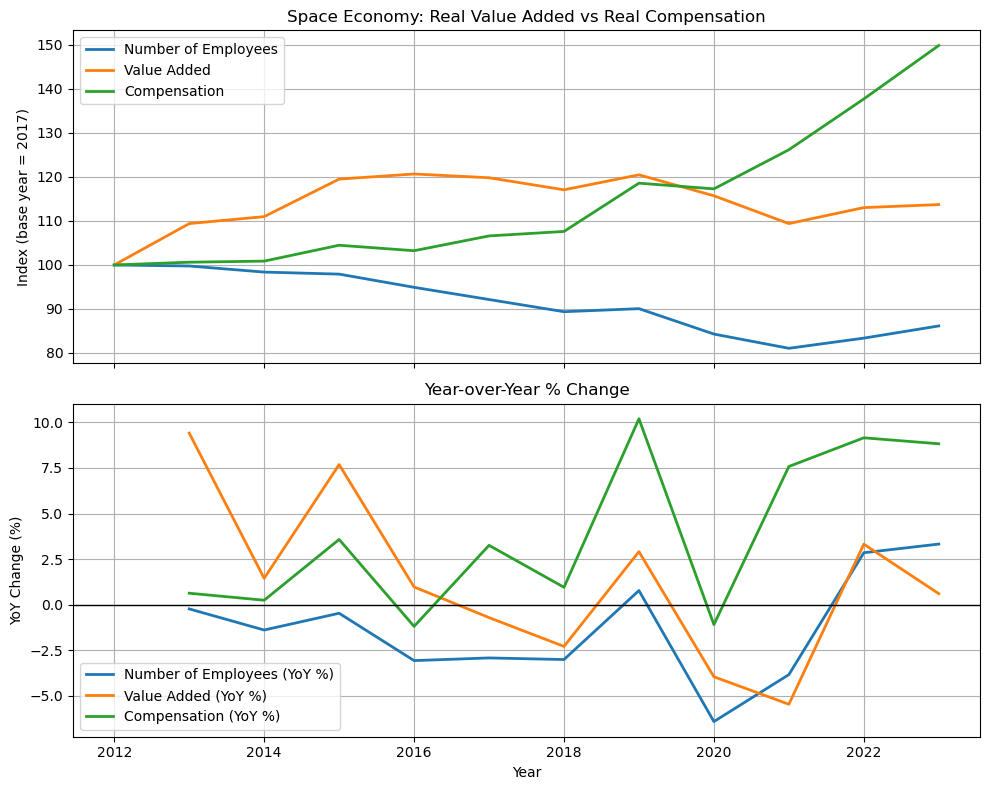

In [45]:
value_added_row = table1_data[table1_data["Category"] == "Space economy"]
compensation_row = real_compensation[real_compensation["Category"] == "Space economy"]
employees_row = table7_data[table7_data["Category"] == "Space economy"]

value_added_series = value_added_row.drop(columns=["Category"]).T.squeeze()
compensation_series = compensation_row.drop(columns=["Category"]).T.squeeze()
employees_row_series = employees_row.drop(columns=["Category"]).T.squeeze()

value_added_series.index = value_added_series.index.astype(int)
compensation_series.index = compensation_series.index.astype(int)
employees_row_series.index = employees_row_series.index.astype(int)

years = value_added_series.index.intersection(compensation_series.index)
value_added_series = value_added_series.loc[years].astype(float)
compensation_series = compensation_series.loc[years].astype(float)
employees_row_series = employees_row_series.loc[years].astype(float)

value_added_yoy = value_added_series.pct_change() * 100
compensation_yoy = compensation_series.pct_change() * 100
employees_yoy = employees_row_series.pct_change() * 100

value_added_idx = value_added_series / value_added_series.iloc[0] * 100
compensation_idx = compensation_series / compensation_series.iloc[0] * 100
employees_idx = employees_row_series / employees_row_series.iloc[0] * 100

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# (A) Indexed levels
axes[0].plot(years, employees_idx, label="Number of Employees", linewidth=2)
axes[0].plot(years, value_added_idx, label="Value Added", linewidth=2)
axes[0].plot(years, compensation_idx, label="Compensation", linewidth=2)
axes[0].set_ylabel("Index (base year = 2017)")
axes[0].set_title("Space Economy: Real Value Added vs Real Compensation")
axes[0].legend()
axes[0].grid(True)

# (B) YoY % changes
axes[1].plot(years, employees_yoy, label="Number of Employees (YoY %)", linewidth=2)
axes[1].plot(years, value_added_yoy, label="Value Added (YoY %)", linewidth=2)
axes[1].plot(years, compensation_yoy, label="Compensation (YoY %)", linewidth=2)
axes[1].axhline(0, color="black", linewidth=1)
axes[1].set_ylabel("YoY Change (%)")
axes[1].set_xlabel("Year")
axes[1].set_title("Year-over-Year % Change")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



## Interpretation:
The space economy’s labor income is growing much faster than its overall net output. This could reflect:

Rising wages in the sector.

Employment growth within space-related industries.

A redistribution of the space economy’s value capture, with more going to labor relative to capital.

## Interpretation:
The resilience of compensation relative to value added indicates that:

Labor earnings in the space economy are less sensitive to output downturns.

Firms may be maintaining employment/wages even when productivity or output slows.

This could point to sticky wages, strategic investment in talent, or increased demand for labor in space-related industries even during output fluctuations.

## Together, the charts show:

Divergence since 2018:

Value added (output) is relatively flat, while compensation (labor income) is surging.

Implication:

The space economy is becoming more labor-intensive in terms of where its gains are going.

Workers are capturing a growing share of the sector’s output, which may indicate rising wages, more jobs, or both.

Economic story:

This suggests the space economy is increasingly important as a source of income and jobs, not just as a producer of high-value technology.

It also raises questions: if compensation rises much faster than value added, is profitability being squeezed? Or is there an inflow of new investment subsidizing labor costs?

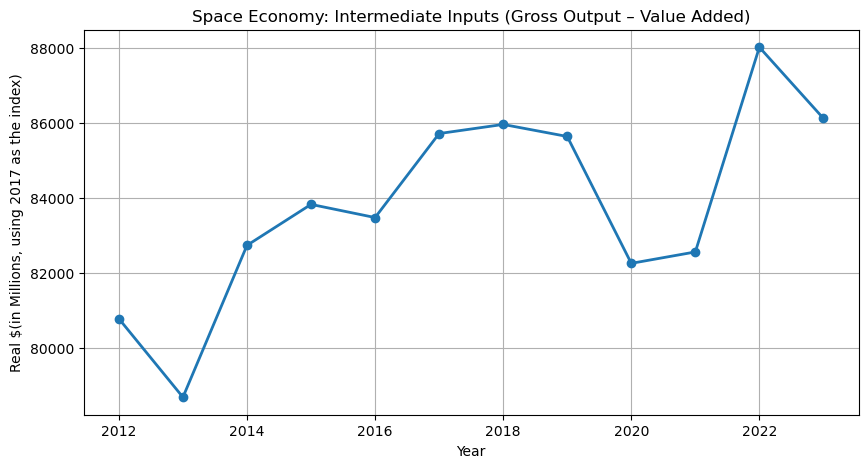

In [52]:
gross_output_row = table4_data[table4_data["Category"] == "Space economy"]
value_added_row = table1_data[table1_data["Category"] == "Space economy"]

gross_output_series = gross_output_row.drop(columns=["Category"]).T.squeeze()
value_added_series = value_added_row.drop(columns=["Category"]).T.squeeze()

gross_output_series.index = gross_output_series.index.astype(int)
value_added_series.index = value_added_series.index.astype(int)

years = gross_output_series.index.intersection(value_added_series.index)
gross_output_series = gross_output_series.loc[years].astype(float)
value_added_series = value_added_series.loc[years].astype(float)

intermediate_inputs = gross_output_series - value_added_series

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(years, intermediate_inputs, marker="o", linewidth=2)
ax1.set_title("Space Economy: Intermediate Inputs (Gross Output – Value Added)")
ax1.set_ylabel("Real $(in Millions, using 2017 as the index)")
ax1.set_xlabel("Year")
ax1.grid(True)

plt.show()

This figure tells us the intermediate inputs for the space economy. The intermediate inputs the space economy buys from other industries (manufacturing, IT, R&D, materials, logistics, etc.). 

Level of the series (~$80–88 billion real $) is how much value other industries contribute indirectly to the space economy’s output each year. It’s a proxy for the supply-chain footprint of the space sector.

The rising or falling trends show us that if intermediate inputs increase, the space economy is demanding more from its upstream suppliers (growth in its surrounding ecosystem). If they fall or stagnate, the sector may be shifting to more self-contained production or efficiency gains that reduce reliance on outside inputs.

THe Volatility (like 2020 drop), likely reflects disruptions (COVID, supply chain shocks, etc.). When inputs dip sharply but VA doesn’t fall as much, it could mean more of the value is being produced internally to the space sector.

Relative to the value added, if intermediate inputs grow faster than value added, the sector is becoming more interconnected with other industries. If value added grows faster, the sector is capturing more of the value internally.



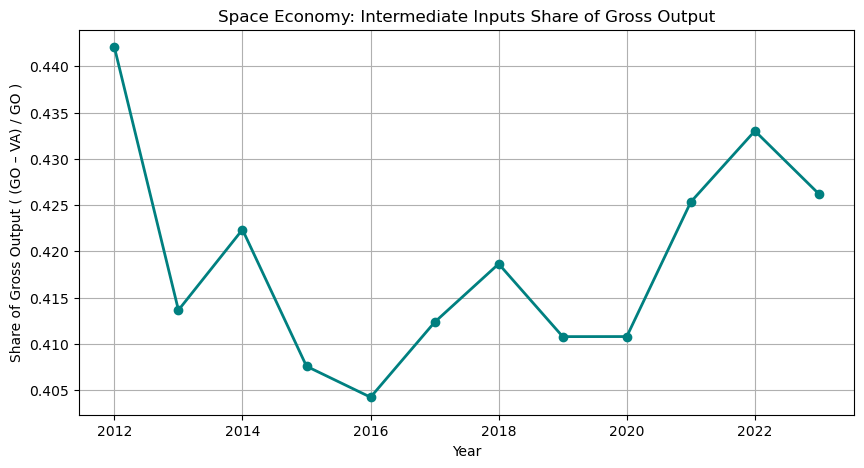

In [54]:
intermediate_share = (gross_output_series - value_added_series) / gross_output_series

# Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(years, intermediate_share, marker="o", linewidth=2, color="teal")
ax.set_title("Space Economy: Intermediate Inputs Share of Gross Output")
ax.set_ylabel("Share of Gross Output ( (GO – VA) / GO )")
ax.set_xlabel("Year")
ax.grid(True)

plt.show()

## Interpretation

High share (closer to 1): The space economy relies heavily on purchased inputs (materials, R&D, IT, logistics, etc.) from other industries → strong supply-chain linkages.

Low share (closer to 0): More of gross output is being generated internally as value added (wages, profits, capital income).

## Trend meaning:

If (GO – VA)/GO increases → space economy is becoming more dependent on upstream suppliers.

If it decreases → the sector is capturing more of the value itself (possibly through vertical integration, automation, or higher productivity).